# __packages__

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
# __functions__

In [26]:
# plot function
def plot_histogram(nums, bins=None):
    fig, ax = plt.subplots()
    if bins:
        counts, bins, patches = ax.hist(nums, bins=bins, density=False)
    else:
        counts, bins, patches = ax.hist(nums, density=False)
    
    plt.show()
    
    return counts, bins, patches
    

---
# __tracks__

### 1) load tracks data and apply basic statistics
### 2) remove outliers for duration

In [50]:
from spotify_tracks_preprocess import pre_processed_df

# load data
tracks = pre_processed_df()
tracks["duration_m"] = tracks.duration_ms.apply(lambda x: x / 60000)
print(f"columns: \n{tracks.dtypes}")
print()
print(tracks.isna().sum())

# basic statistics
stat = tracks.describe(percentiles=[.25, .5, .75, .95])
stat

columns: 
track_id         object
album_id         object
artists_id       object
disc_number       int64
duration_ms       int64
explicit           bool
name             object
popularity        int64
track_number      int64
duration_m      float64
dtype: object

track_id        0
album_id        0
artists_id      0
disc_number     0
duration_ms     0
explicit        0
name            0
popularity      0
track_number    0
duration_m      0
dtype: int64


,disc_number,duration_ms,popularity,track_number,duration_m
count,2.261596e+06,2.261596e+06,2.261596e+06,2.261596e+06,2.261596e+06
mean,1.046621e+00,2.475613e+05,1.337959e+01,6.898943e+00,4.126022e+00
std,4.637556e-01,1.675031e+05,1.391398e+01,7.599731e+00,2.791718e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.842000e+05,1.000000e+00,2.000000e+00,3.070000e+00
50%,1.000000e+00,2.252270e+05,9.000000e+00,5.000000e+00,3.753783e+00
75%,1.000000e+00,2.782560e+05,2.100000e+01,9.000000e+00,4.637600e+00
95%,1.000000e+00,4.329362e+05,4.100000e+01,1.800000e+01,7.215604e+00
max,5.200000e+01,2.074458e+07,9.200000e+01,5.460000e+02,3.457429e+02


In [22]:
# remove outliers for duration
print(f"before shape: {tracks.shape}")
tracks = tracks.loc[tracks.duration_m <= stat.loc["95%", "duration_m"]]

print(f"after shape: {tracks.shape}")

before shape: (2261596, 10)
after shape: (2148516, 10)


### 3) plotting by columns

columns: duration_m


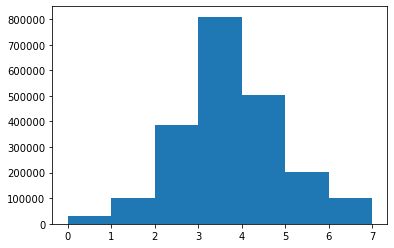


        bins   : [0 1 2 3 4 5 6 7]
        counts : [28967, 100894, 386072, 809607, 503354, 204336, 100663]
          
columns: popularity


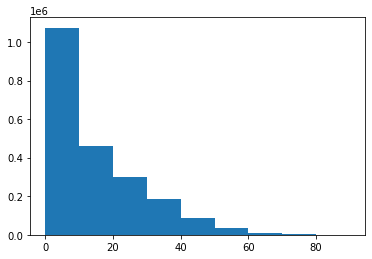


        bins   : [ 0 10 20 30 40 50 60 70 80 90]
        counts : [1073711, 458903, 301999, 183762, 84647, 32767, 10130, 2314, 280]
          


In [30]:
col_list = ["duration_m", "popularity"]

for col in col_list:
    print(f"columns: {col}")

    if col == "duration_m":
        bins = range(0, 8, 1)
    elif col == "popularity":
        bins = range(0, 100, 10)
        
    counts, bins, patches = plot_histogram(tracks[col].tolist(), bins=bins)
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)


---
# __audio-features__

### 1) load tracks data and apply basic statistics

In [51]:
from spotify_audio_features_preprocess import pre_processed_df

# load data
audio_features = pre_processed_df()
print(f"columns: \n{audio_features.dtypes}")
print()
print(audio_features.isna().sum())

stat = audio_features.describe()
stat

columns: 
track_id             object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


,acousticness,danceability,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06,2.262191e+06
mean,3.547740e-01,5.504296e-01,5.848759e-01,2.208220e-01,2.091071e-01,-9.660528e+00,6.549779e-01,8.923351e-02,1.199894e+02,3.879917e+00,4.757061e-01
std,3.543964e-01,1.845300e-01,2.660167e-01,3.494054e-01,1.898148e-01,5.626076e+00,4.753756e-01,1.152086e-01,2.992179e+01,4.720420e-01,2.699766e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.220000e-02,4.270000e-01,3.890000e-01,0.000000e+00,9.570000e-02,-1.191000e+01,0.000000e+00,3.540000e-02,9.693900e+01,4.000000e+00,2.470000e-01
50%,2.150000e-01,5.650000e-01,6.220000e-01,6.030000e-04,1.280000e-01,-8.176000e+00,1.000000e+00,4.700000e-02,1.200070e+02,4.000000e+00,4.660000e-01
75%,6.910000e-01,6.890000e-01,8.090000e-01,4.210000e-01,2.640000e-01,-5.826000e+00,1.000000e+00,8.380000e-02,1.380530e+02,4.000000e+00,6.970000e-01
max,9.960000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,4.923000e+00,1.000000e+00,9.710000e-01,2.499870e+02,5.000000e+00,1.000000e+00


### 2) plotting by columns

columns: acousticness


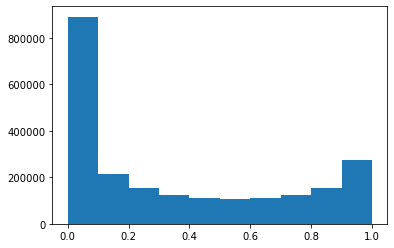


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [890537, 214072, 153003, 122124, 109713, 107108, 111217, 124646, 153876, 275895]
          
columns: danceability


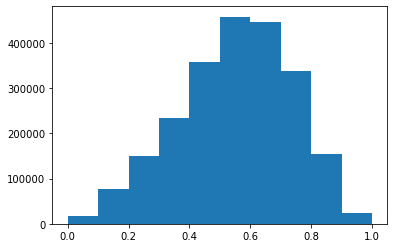


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [18090, 76886, 149794, 234752, 358519, 458618, 447122, 339468, 155488, 23454]
          
columns: energy


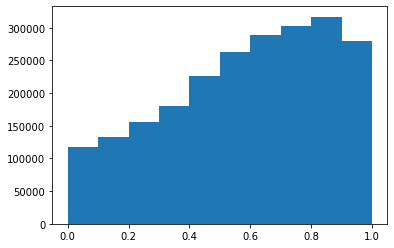


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [118218, 132340, 155959, 179762, 226047, 263194, 288838, 301902, 316847, 279084]
          
columns: instrumentalness


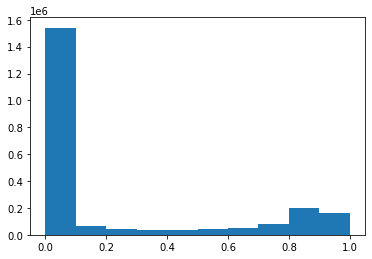


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [1540961, 64172, 45327, 38185, 37449, 40944, 51126, 81613, 197796, 164618]
          
columns: liveness


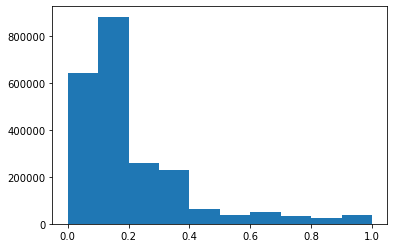


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [643705, 882672, 258940, 229404, 61913, 39516, 48563, 33730, 24144, 39604]
          
columns: loudness


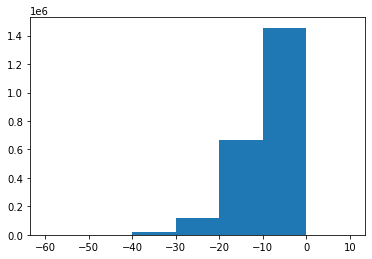


        bins   : [-60 -50 -40 -30 -20 -10   0  10]
        counts : [281, 1428, 16952, 120776, 666086, 1455721, 947]
          
columns: mode


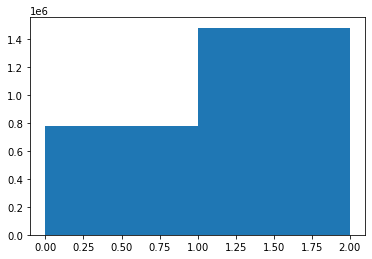


        bins   : [0 1 2]
        counts : [780506, 1481685]
          
columns: speechiness


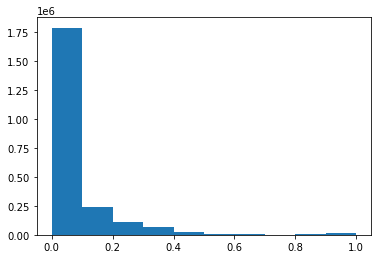


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [1789530, 236626, 111162, 67750, 27350, 8175, 3025, 2351, 4338, 11884]
          
columns: tempo


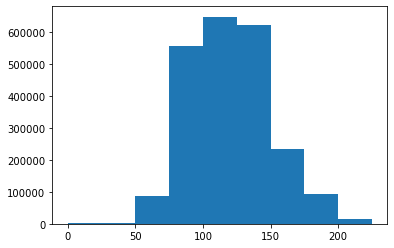


        bins   : [  0  25  50  75 100 125 150 175 200 225]
        counts : [3152, 2150, 87349, 554934, 647775, 622737, 235432, 94565, 13969]
          
columns: time_signature


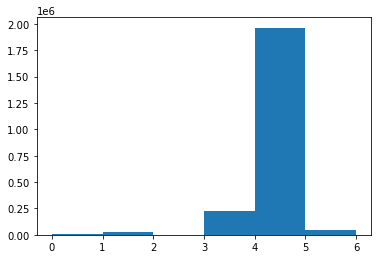


        bins   : [0 1 2 3 4 5 6]
        counts : [3206, 23827, 0, 229148, 1964207, 41803]
          
columns: valence


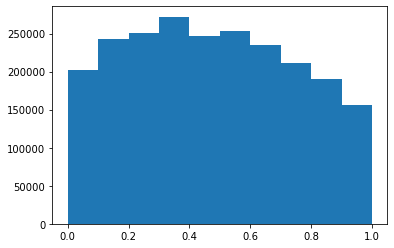


        bins   : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
        counts : [202438, 243270, 251219, 272108, 247398, 253887, 234782, 211567, 190046, 155476]
          


In [45]:
col_list = [
    "acousticness", 
    "danceability", 
    "energy", 
    "instrumentalness", 
    "liveness", 
    "loudness", 
    "mode", 
    "speechiness",
    "tempo", 
    "time_signature", 
    "valence"
    ]

for col in col_list:
    print(f"columns: {col}")
    
    if col in ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "valence"]:
        bins = list(np.arange(0, 1.1, 0.1))
    elif col == "loudness":
        bins = range(-60, 20, 10)
    elif col == "mode":
        bins = range(0, 3, 1)
    elif col == "tempo":
        bins = range(0, 250, 25)
    elif col == "time_signature": 
        bins = range(0, 7, 1)
        
    counts, bins, patches = plot_histogram(audio_features[col].tolist(), bins=bins)
    print(f"""
        bins   : {bins}
        counts : {list(map(int, counts))}
          """)


---
# __tracks with albums__

### 1) load ablums data
### 2) remove null rows from albums data

In [54]:
album_file_path = "./album_table.csv"
albums = pd.read_csv(album_file_path)
albums["id"] = albums.id.str.strip()
albums["release_date"] = albums.release_date.str.strip()
print(albums.isna().sum())

albums = albums.loc[albums.id.notna()]

print(f"columns: \n{albums.columns}")
print(f"shape: {albums.shape}")


album_type       274
artists_id       274
copyrights       274
genres           274
id               274
label           1455
name             274
popularity       274
release_date     274
total_tracks     274
track_ids        274
dtype: int64
columns: 
Index(['album_type', 'artists_id', 'copyrights', 'genres', 'id', 'label',
       'name', 'popularity', 'release_date', 'total_tracks', 'track_ids'],
      dtype='object')
shape: (845511, 11)


### 3) drop duplicates from albums data

In [55]:
print(f"unique id: {len(albums.id.unique())}")
print(f"duplicated rows: {albums.duplicated().sum()}")
print(f"{len(albums.id.unique())} + {albums.duplicated().sum()} = {len(albums.id.unique())+albums.duplicated().sum()}")

albums = albums.drop_duplicates(subset="id")

unique id: 577186
duplicated rows: 229942
577186 + 229942 = 807128


### 4) combine with tracks data
### 5) plot histogram by release year

,track_id,album_id,artists_id,disc_number,duration_ms,explicit,name,popularity,track_number,duration_m,release_date,release_year,release_year_bin
0,5iYe4mt1bf1KVzVM8EY6y8,3ruxxNJfKwSeghjqG6JL3y,0r0R5nIjDY04TfxRM10Bcb,1,228213,True,Du bist schön,61,19,3.803550,2016-12-16,2016,2010
1,5VLQ3X8Bb1lywLlEILvIOB,4F0xMut2laQg8WRFEiDCc2,100OXLitsMR5uquMteikLK,1,239853,False,From The Inside Out (Medium Without Background...,0,6,3.997550,2010-06-22,2010,2010
2,2RJwsknbZITuZyth2o9L7n,76Zg0RE2Fin7AqBSTFFrDF,6hhA8TKRNryM8FNzqCqdDO,1,216240,False,Your Name,17,7,3.604000,2001-01-01,2001,2000
3,4VS79t3vFH7mH7NcWuFjAC,7LCfpsK9t0JnVeL3mtQ3dC,1Y8cdNmUJH7yBTd9yOvr5i,1,243706,False,Sail On,19,12,4.061767,1998,1998,1990
4,1eHFoh1qFNKTvIEHvf8BPh,4Ii6sQw0JWI3gsi2zETz4l,0W1A76DHc7LAIoq8DSSXXy,1,240238,False,Jony and Jaq,1,7,4.003967,2011-06-09,2011,2010


[2010 2000 1990 1960 1980 1970 1950 2020 1920 1940 1930 1900 1880 1910
 1190]


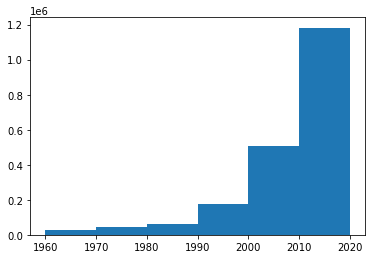

(array([  26587.,   42752.,   60232.,  174977.,  509009., 1182196.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

In [57]:
joined_df = tracks.join(albums.loc[:, ["id", "release_date"]].set_index("id"), on="album_id", lsuffix="_caller", rsuffix="_other")
joined_df = joined_df.loc[joined_df.release_date.notna()]
joined_df = joined_df.loc[joined_df.release_date.apply(lambda x: False if x.startswith("0") else True)]

f = lambda x: int(x[:4]) if len(x) >= 5 else int(x)
joined_df["release_year"] = joined_df.release_date.apply(f)

f = lambda x: (x // 10) * 10
joined_df["release_year_bin"] = joined_df.release_year.apply(f)

display(joined_df.head())
print(joined_df.release_year_bin.unique())

plot_histogram(joined_df.release_year_bin.tolist(), bins=range(1960, 2030, 10))